# Analise de Sentimento usando Python.
### Introdução

Toda introdução e análise sobre este projeto está localizada aqui (URL)

## I. Set Up
Primeiramente devemos importar as duas primeiras bibliotecas que vamos ultilizar neste projeto, que são Tweepy e Pandas.

In [1]:
# Importando as Bibliotecas
import tweepy
import pandas as pd

In [2]:
# Autenticação das Chaves e Tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

As chaves e tokens são ultizados para a autenticação, sendo vinculada a uma conta de desenvolvedor no Twitter. Ambas a chaves e tokens devem permanecer privadas.

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

Agora podemos testar a funcionalidade da API do Twitter. Fazendo uma solicitação ao servidor para ultizar os dados que precisamos.

In [5]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.user.name, tweet.text)

## II. Analise de Sentimento

Agora buscamos os dados necessários para que a análise seja feita. Optinei por criar uma função que contém o argumento ('hashtag') como entrada e retorna em Data Frame com as informações necessárias.

In [6]:
# Criação de função para agrupar todas as ações para buscar dados da API (hashtag):
def fetch_tweets(hashtag):
    tweet_user = []
    tweet_hora = []
    tweet_string = []
   
    for tweet in tweepy.Cursor(api.search,q=hashtag, count=1500).items(1500):
            if (not tweet.retweeted) and ("RT @" not in tweet.text):
                if tweet.lang == "en":
                    tweet_user.append(tweet.user.name)
                    tweet_hora.append(tweet.created_at)
                    tweet_string.append(tweet.text)
                    
    df = pd.DataFrame({"usuário":tweet_user, "hora": tweet_hora, "tweet": tweet_string})
    return df

In [7]:
ds_df = fetch_tweets("Drive to Survive")

In [8]:
print(ds_df.shape)
ds_df.head(10)

(488, 3)


,usuário,hora,tweet
0,jão 🌊,2021-03-15 19:23:55,@F1 Oscar-worthy race. Deserve 3 episodes on D...
1,Izzy,2021-03-15 19:22:52,Imagine if drive to survive was around for the...
2,Roms || I need F1 mutuals 🏎,2021-03-15 19:17:42,I can’t wait for all the meme material Drive T...
3,⚔️,2021-03-15 19:15:33,Drive to survive at the end of the week https:...
4,cal 👑,2021-03-15 19:03:25,F1 Drive to Survive and Falcon and the Winter ...
5,Marco,2021-03-15 19:00:42,Hat jemand Bock auf eine „Drive to Survive“ - ...
6,OC Movie Reviews,2021-03-15 19:00:29,"Formula 1: Drive To Survive – Episode 5, The E..."
7,Zena Hooks,2021-03-15 18:55:34,@EuphemiaSpeaks While I understand the evoluti...
8,Couch Potato No.1,2021-03-15 18:45:44,@AstonMartinF1 Good to see you in action\nHope...
9,Couch Potato No.1,2021-03-15 18:44:22,I see what you did there @netflix @NetflixIndi...


### Pontuação de Sentimento (Positiva e Negativa)
Agora para a tarefa de análise de sentimento será ultilizando a biblioteca chamada TextBlob, que também é responsavel pelo
processamento dos dados em formato de texto. Assim será ultilizado também a função lambda para retornar a pontuação de polaridade (positiva ou negativa).

In [9]:
from textblob import TextBlob

In [14]:
sent_score_1 = TextBlob("I really love the upcoming season of Drive to Survive").sentiment
sent_score_2 = TextBlob("I really hate the upcoming season of Drive to Survive").sentiment
print("Pontuação de Sentimento 1:", sent_score_1)
print("Pontuação de Sentimento 2:", sent_score_2)

Pontuação de Sentimento 1: Sentiment(polarity=0.5, subjectivity=0.6)
Pontuação de Sentimento 2: Sentiment(polarity=-0.8, subjectivity=0.9)


In [15]:
ds_df["sentimento"] = ds_df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
print(ds_df.head())

                       usuário                hora  \
0                        jão 🌊 2021-03-15 19:23:55   
1                         Izzy 2021-03-15 19:22:52   
2  Roms || I need F1 mutuals 🏎 2021-03-15 19:17:42   
3                           ⚔️ 2021-03-15 19:15:33   
4                        cal 👑 2021-03-15 19:03:25   

                                               tweet  sentiment  sentimento  
0  @F1 Oscar-worthy race. Deserve 3 episodes on D...        0.0         0.0  
1  Imagine if drive to survive was around for the...        0.0         0.0  
2  I can’t wait for all the meme material Drive T...        0.0         0.0  
3  Drive to survive at the end of the week https:...        0.0         0.0  
4  F1 Drive to Survive and Falcon and the Winter ...        0.0         0.0  


Numero total de sentimentos, positivo ou negativo:

In [16]:
# Ultilização de Boolean para diferenciar sentimentos positivos ou negativos no Data Frame.
ds_df_pos = ds_df[ds_df["sentimento"] > 0.0]
ds_df_neg = ds_df[ds_df["sentimento"] < 0.0]
print("Tweets Positivos:", len(ds_df_pos))
print("Tweets Negativos:", len(ds_df_neg))

Tweets Positivos: 138
Tweets Negativos: 44


In [17]:
def calc_sentimento(hashtag):
    df = fetch_tweets(hashtag)
    df["sentimento"] = df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df["sentimento"] > 0.0]
    df_neg = df[df["sentimento"] < 0.0]
    print("Tweets Positivos em #{}: ".format(hashtag), len(df_pos))
    print("Tweets Negativos em #{}: ".format(hashtag), len(df_neg))

In [18]:
calc_sentimento("Drive to Survive")

Tweets Positivos em #Drive to Survive:  137
Tweets Negativos em #Drive to Survive:  42


### Visualização de Dados
Para visualização dos dados, será usado a biblioteca Matplotlib mostrando os resultados em gráfico de pizza.

In [19]:
# Importando bibliotecas para plot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
%config InlineBackend.figure_format ='retina'

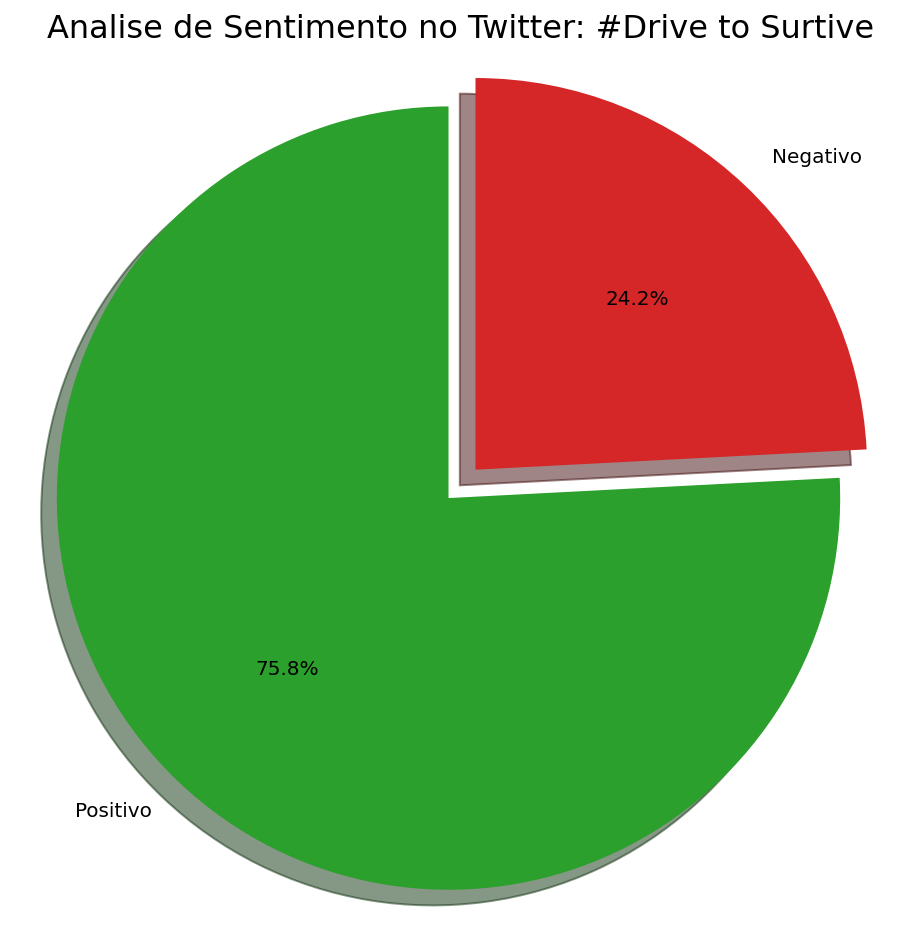

In [21]:
fig1, ax1 = plt.subplots(figsize=(8,8))

labels = ['Positivo', 'Negativo']
sizes = [len(ds_df_pos), len(ds_df_neg)]
explode = (0, 0.1)

tb_10_green = (44/255,160/255,44/255)
tb_10_red = (214/255,39/255,40/255)
colors=[tb_10_green, tb_10_red]

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Analise de Sentimento no Twitter: #Drive to Surtive", fontsize=16)
    
plt.show()

In [23]:
# Criando uma função para reunir os plots
def draw_sentimento(pos,neg,hashtag):
    fig1, ax1 = plt.subplots(figsize=(8,8))
    
    labels = ['Positivo', 'Negativo']
    sizes = [pos,neg]
    explode = (0, 0.1) 

    tb_10_green = (44/255,160/255,44/255)
    tb_10_red = (214/255,39/255,40/255)
    colors=[tb_10_green, tb_10_red]

    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
    ax1.axis('equal')  
    plt.show()

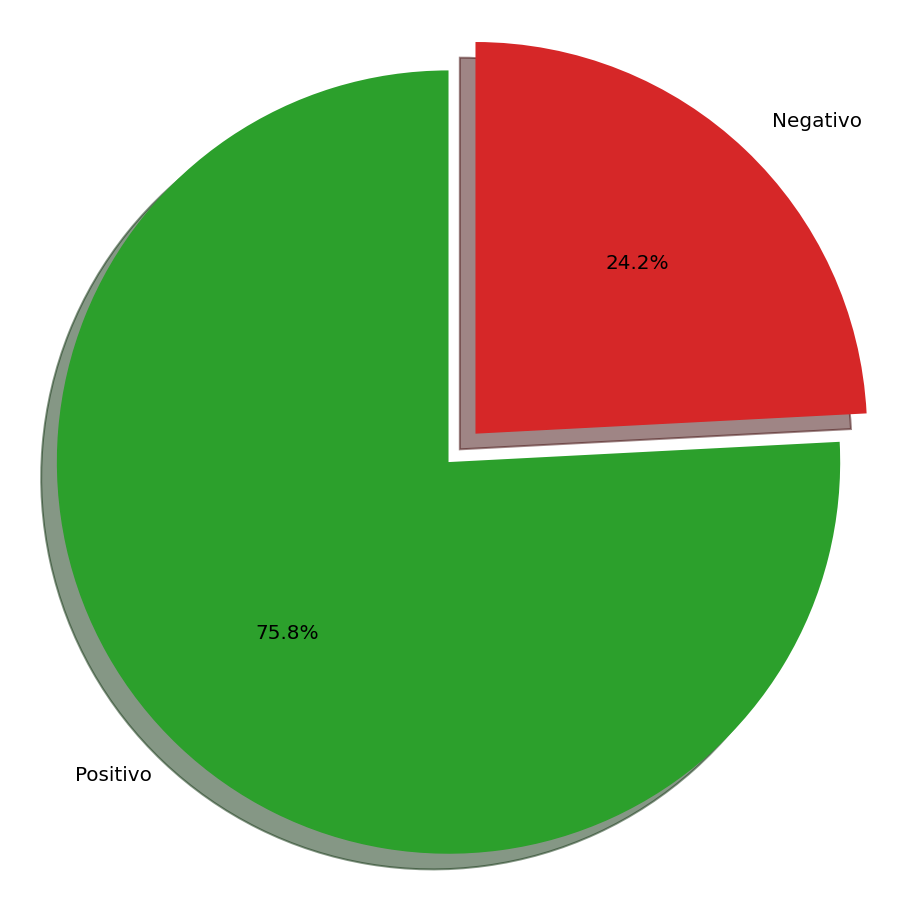

In [24]:
draw_sentimento(len(ds_df_pos), len(ds_df_neg), "Drive to Survive")

Na primeira analise podemos verificar que 77% dos tweets analisados tem um sentimento bom sobre a próxima temporada de Drive to Survive.

## III. Analise de Sentimento por Localização
Como parte de qualquer esporte, sua popularidade varia de acordo com sua localização. No caso da F1, sua popularidade na Europa é maior que em outros continentes como America do Norte, America do Sul, Asia e etc. Com a API do Twitter podemos verificar e analizar essa informação usando dados de localizações dos Tweets.

In [25]:
def fetch_tweets(hashtag, locate):
    tweet_user = []
    tweet_user_location = []
    tweet_hora = []
    tweet_string = []
   
    for tweet in tweepy.Cursor(api.search,q=hashtag, count=1500).items(1500):
            if (not tweet.retweeted) and ('RT @' not in tweet.text):
                if tweet.lang == "en":
                    tweet_user.append(tweet.user.name)
                    tweet_hora.append(tweet.created_at)
                    tweet_string.append(tweet.text)
                    if locate:
                        tweet_user_location.append(tweet.user.location)
                        df = pd.DataFrame({'usuário':tweet_user, 'localização':tweet_user_location, 'hora': tweet_hora, 'tweet': tweet_string})
                    else:
                        df = pd.DataFrame({'usuário':tweet_user, 'hora': tweet_hora, 'tweet': tweet_string})
    
    return df

In [26]:
loc_ds_df = fetch_tweets("Drive to Survive",locate=True)

In [27]:
loc_ds_df["localização"].value_counts()

                           146
Italy                        9
South Africa                 9
United Kingdom               5
England, United Kingdom      4
                          ... 
  Johannesburg               1
Newport Beach, CA            1
Mich Again                   1
Liverpool, UK                1
St Clair, NSW                1
Name: localização, Length: 280, dtype: int64

In [28]:
loc_ds_df["localização"].unique()

array(['Lyon | Strasbourg', 'Gama, Brasília', 'Northern Ireland', '',
       'Abilene, TX', 'Johannesburg', 'San Pedro Alcantara-Malaga',
       '20, she/her', "'The Faraway, Nearby'", 'San Antonio, TX',
       'Avon, Indiana', 'Nairobi', 'North Las Vegas, NV', 'Paris, France',
       'Newry, Northern Ireland', 'Indonesia', 'Richardson, TX',
       'Prince Frederick, MD', 'Wenatchee, WA', 'Germany // NRW // Moers',
       'Earls Colne, Colchester, Essex', 'year 2013', 'she/her',
       'she/her | 22', 'Yorkshire and The Humber, England', 'Italy',
       'Hometowns: Boston, NYC', 'Oregon, USA', 'New Delhi', 'Naboo ',
       'London, United Kingdom', 'Polska', 'Antwerpen, België', 'Brasil',
       'London', 'Bouglainval, France', '16, she/her', 'she/her ₊˚.༄ ',
       '🇬🇭&🇲🇾', 'oned ◮ skam ◮ glee ◮ ', 'magical night ', 'La Jolla, CA',
       'Iceland', 'chile', 'Hanoi, Vietnam', 'she/her ★ 17',
       'Putrajaya, Wilayah Persekutuan', 'chicago',
       'nc, usa, pale blue dot ', 'Punderd

### Seleção de Localização
Nos deparamos com muitas localizações diferentes como por exemplo (London, Newry, Yorkshire e Tamworth) dentre outras cidades do Reino Unido e também muitas outras cidades nos EUA (Los Angeles, NYC, Chicago e Portland). Para selecionar a localização que há interesse será criado um RegEx.

In [45]:
import re
uk_pattern = r"\bEngland\b|\bUK\b|\bLondon\b|\bScotland\b|\bIreland\b|\bLiverpool\b"
uk_ds_df = loc_ds_df.copy()
uk_ds_df = uk_ds_df[uk_ds_df["localização"].str.contains(uk_pattern,flags=re.I)]
uk_ds_df

,usuário,localização,hora,tweet
2,Izzy,Northern Ireland,2021-03-15 19:22:52,Imagine if drive to survive was around for the...
23,The Apex Motorsport,Northern Ireland,2021-03-15 17:35:52,Why you NEED to watch Drive to Survive Season ...
24,Niall Downey,"Newry, Northern Ireland",2021-03-15 17:33:57,@julie_ssss @alanGbrereton @GabrielScally @Iri...
35,Matthew,"Yorkshire and The Humber, England",2021-03-15 16:50:52,Can’t wait to see this man on F1 Drive to Surv...
46,William 🏁 | #WeSayNoToMazepin,"London, United Kingdom",2021-03-15 16:24:34,Why do I feel like Vettel is going to be portr...
54,Jem | Young Sasuke 🐺,London,2021-03-15 15:50:27,Falcon &amp; The Winter Soldier\nJustice Leagu...
55,Jem | Young Sasuke 🐺,London,2021-03-15 15:43:49,Justice League: Snyder Cut and Drive to Surviv...
88,WTF1,"London, England",2021-03-15 14:04:36,And if you want to know what moments are cover...
89,WTF1,"London, England",2021-03-15 14:04:04,Season 3 of Drive to Survive drops on Friday. ...
107,T3.com,"Bath, England",2021-03-15 12:42:47,Formula 1: Drive to Survive Season 3 release d...


In [36]:
us_pattern = r"\bUSA\b|\bUS\b|\bNYC\b|\bLA\b|\bChicago\b|\bBoston\b"
us_ds_df = loc_ds_df.copy()
us_ds_df = us_ds_df[us_ds_df["localização"].str.contains(us_pattern,flags=re.I)]
us_ds_df

,usuário,localização,hora,tweet
38,#TheOnlyWayOutIsThrough,"Hometowns: Boston, NYC",2021-03-15 16:46:23,@nypost #BodyCam\nthis headline scared the shi...
39,kailee,"Oregon, USA",2021-03-15 16:45:06,so excited that season 3 of Drive to Survive c...
68,Taylor Joyce,"La Jolla, CA",2021-03-15 14:56:05,Just read the breakdown of “Drive to Survive” ...
75,klexos,chicago,2021-03-15 14:37:24,@Evosp3c cant wait for the new drive to surviv...
76,a dave in the life,"nc, usa, pale blue dot",2021-03-15 14:36:40,@gorycoryhorror i remember when the same was s...
197,Rich Burroughs,"Portland, Oregon USA",2021-03-15 06:19:39,Drive to Survive season 3 drops on Friday 👀
219,David Tolosa,"Chicago, IL",2021-03-15 03:30:30,This Friday we get TFATWS and DRIVE TO SURVIVE...
323,Mike,"Illinois, USA",2021-03-14 18:01:32,@MariaKj1991 So pumped for Drive to Survive!
328,Corey Masisak,"Hell's Kitchen, NYC",2021-03-14 17:44:48,🚨Also five days until Season 3 of Drive To Sur...
429,Reality Show (esp),¡En la tierra del show diario!,2021-03-14 08:27:20,#Documental F1 Drive to Survive 3: Analizamos ...


### Pontuação e Visualização de Dados
Com a função 'calc_sentimento' podemos passar a localização baseada no Data Frame que são Reino Unido (Inglaterra, Escosia e Irlanda) e EUA como argumento.

In [37]:
def calc_sentimento(hashtag, dataframe):
    df = dataframe
    df["sentimento"] = df["tweet"].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
    df_pos = df[df["sentimento"] > 0.0]
    df_neg = df[df["sentimento"] < 0.0]
    print("Tweets Positivos para #{}: ".format(hashtag), len(df_pos))
    print("Tweets Negativos para #{}: ".format(hashtag), len(df_neg))
    return (len(df_pos), len(df_neg))

In [38]:
uk_sentimento = calc_sentimento("Drive to Survive", uk_ds_df)
print(uk_sentimento)

Tweets Positivos para #Drive to Survive:  23
Tweets Negativos para #Drive to Survive:  4
(23, 4)


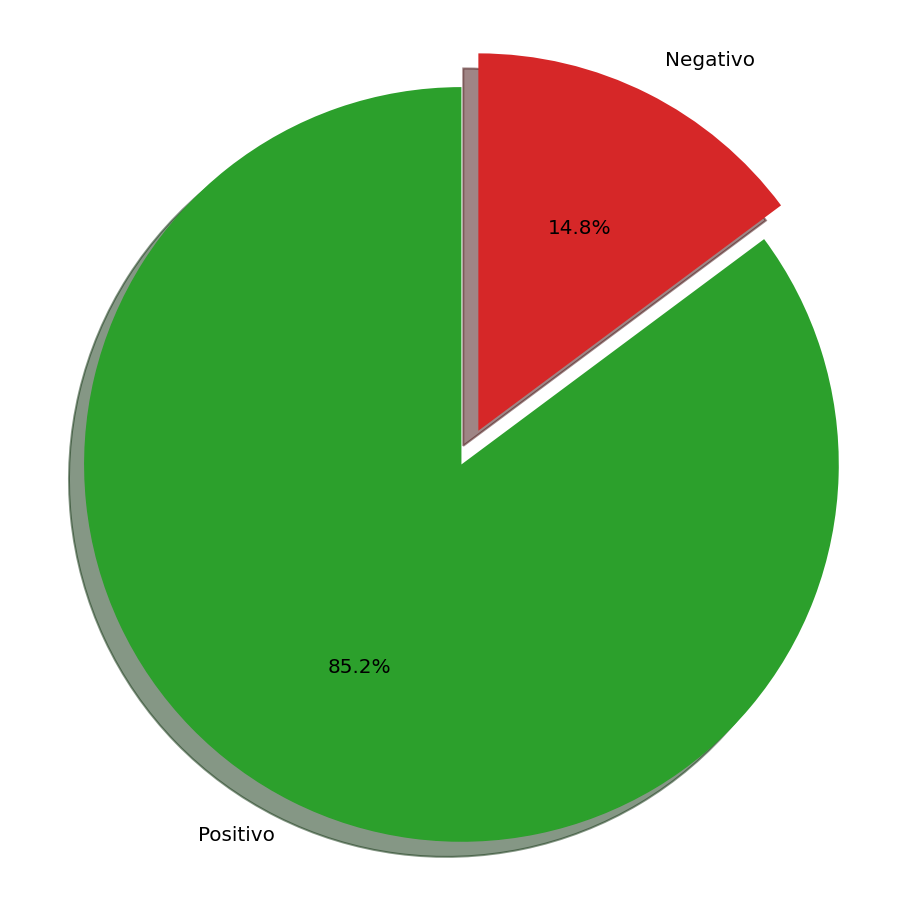

<Figure size 432x288 with 0 Axes>

In [46]:
draw_sentimento(uk_sentimento[0], uk_sentimento[1], "Drive to Survive")
plt.savefig("sentimento_uk.png")

In [40]:
us_sentimento = calc_sentimento("Drive to Survive", us_ds_df)
print(us_sentimento)

Tweets Positivos para #Drive to Survive:  4
Tweets Negativos para #Drive to Survive:  0
(4, 0)


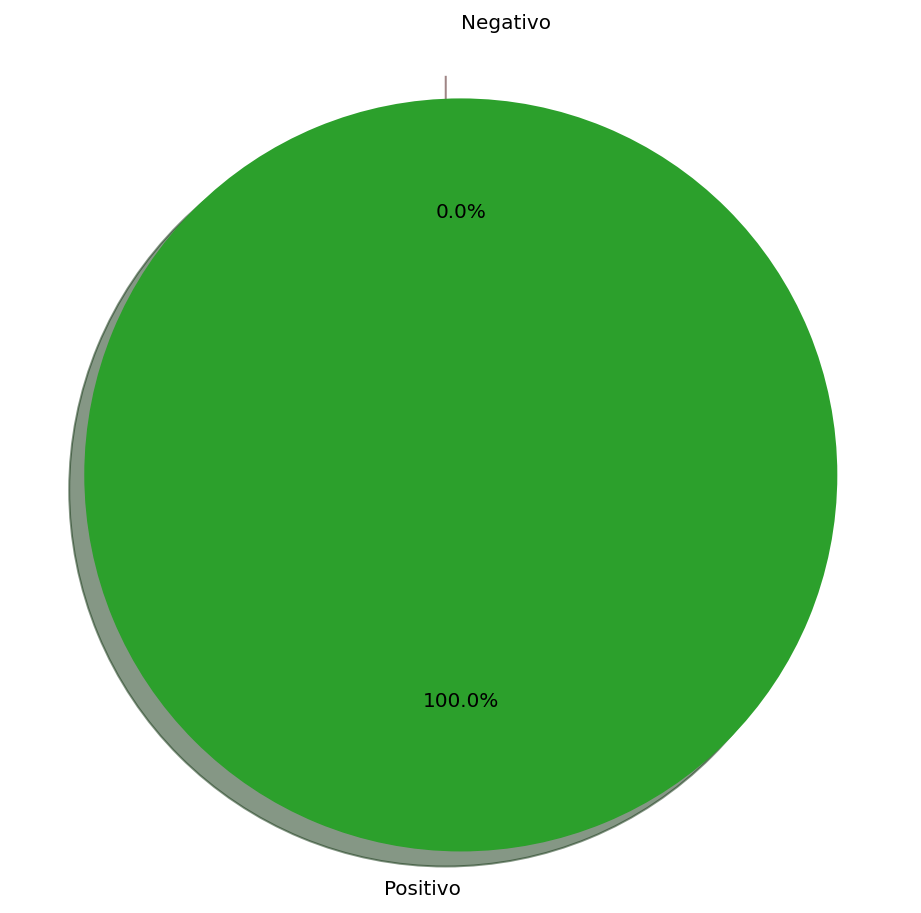

<Figure size 432x288 with 0 Axes>

In [47]:
draw_sentimento(us_sentimento[0], us_sentimento[1], "Drive to Survive")
plt.savefig("sentimento_usa.png")

# Analise

Mesmo com poucos Tweets chegamos a conclusão que o sentimento do publico com a nova temporada de Drive to Survive é muito positiva. Após o trailer promocional, no Reino Unido (Inglaterra, Irlanda e Escocia) 85.2% dos Tweets analizados tiveram o feedback positivo em quanto 14.2% negativo. Já nos EUA o resultado foi ainda melhor com 100% de feedback positivo. 
Novamente, esses dados foram gerandos com apenas 1500 Tweets devido a limitação da conta free de desenvolvedor, mas mesmo com isso podemos ver uma alta portentagem de aceitação do publico para a nova temporada de Drive to Survive.

# Conclusão 

Muitas industrias podem se beneficiar do uso de Machine Learning para aprimorar a entrega de seus serviços ou produtos para seu clientes, gerando maior feedback e interação com o mesmo. Usando DS a empresa terá diversos insights que não eram possiveis antes, pois a manipulação e analize dos dados deve ser feita de uma forma customizada para atender as necessidades e objetivos da campanha.

Este projeto é uma introdução básica de analise de sentimento, no qual foi explorado o sentimento do publico alvo para a nova temporada de um produto de mídia chamado Drive to Survive. Podemos ver as diversas localizações que apareceram durante a exploração dos dados, mesmo ultilizando poucos Tweets devido a limitação da conta de desenvolvedor no Twitter. Mas que no qual o objetivo foi visualizar melhor quais foram os mecanismos usados para fazer esta exploração e analise dos dados.